Local version adapted from https://www.kaggle.com/code/ryanholbrook/custom-convnets/tutorial#Your-Turn

In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [3]:

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    return seed
seed = set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


In [4]:
from shared import load_data


ds_train, ds_test = load_data(seed)

Found 8642 files belonging to 2 classes.
Using 6914 files for training.
Using 1728 files for validation.


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

# Trains about 60 min, to 84%
model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # # Block Three
    # layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    # layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    # layers.MaxPool2D(),


    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 65536)             0         
                                                                 
 dense_5 (Dense)             (None, 6)                

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

In [17]:
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=20,
)

Epoch 1/20


109/109 [==============================] - 47s 430ms/step - loss: 0.5346 - binary_accuracy: 0.7089 - val_loss: 0.5650 - val_binary_accuracy: 0.7060
Epoch 2/20
109/109 [==============================] - 45s 417ms/step - loss: 0.5111 - binary_accuracy: 0.7253 - val_loss: 0.5542 - val_binary_accuracy: 0.7124
Epoch 3/20
109/109 [==============================] - 45s 414ms/step - loss: 0.4923 - binary_accuracy: 0.7345 - val_loss: 0.5424 - val_binary_accuracy: 0.7303
Epoch 4/20
109/109 [==============================] - 46s 426ms/step - loss: 0.4677 - binary_accuracy: 0.7573 - val_loss: 0.5456 - val_binary_accuracy: 0.7257
Epoch 5/20
109/109 [==============================] - 47s 435ms/step - loss: 0.4806 - binary_accuracy: 0.7496 - val_loss: 0.5417 - val_binary_accuracy: 0.7384
Epoch 6/20
109/109 [==============================] - 45s 413ms/step - loss: 0.4387 - binary_accuracy: 0.7655 - val_loss: 0.5301 - val_binary_accuracy: 0.7448
Epoch 7/20
109/109 [==============================] - 45s

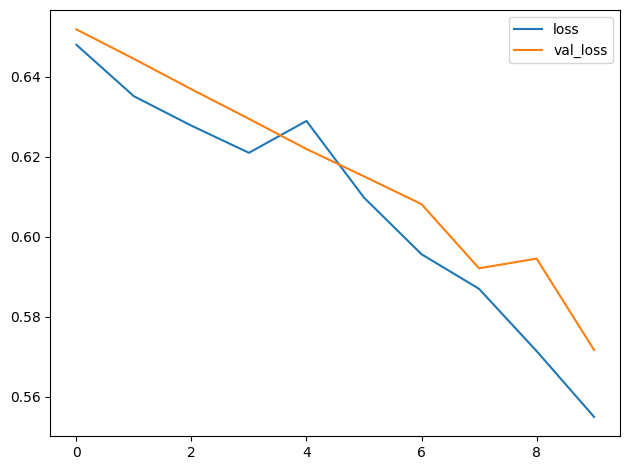

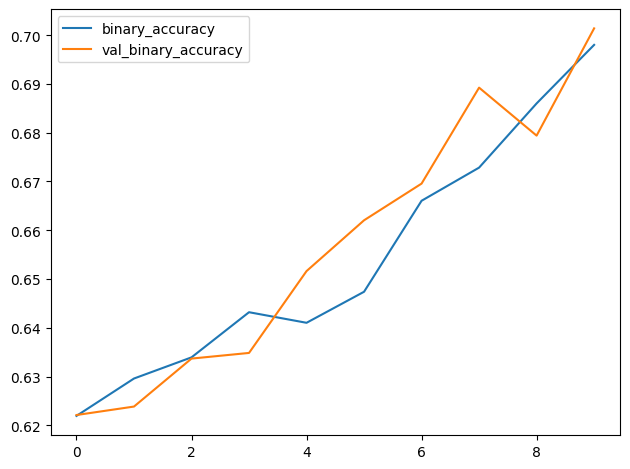

In [16]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [14]:
# Quick model, trains in about 20 mins, 79% acc
quick_model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),


    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

In [15]:
quick_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)       

In [16]:
quick_model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

quick_history = quick_model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

Epoch 1/50
80/80 [==============================] - 27s 325ms/step - loss: 0.6861 - binary_accuracy: 0.5611 - val_loss: 0.6785 - val_binary_accuracy: 0.5785
Epoch 2/50
80/80 [==============================] - 25s 314ms/step - loss: 0.6752 - binary_accuracy: 0.5787 - val_loss: 0.6657 - val_binary_accuracy: 0.5785
Epoch 3/50
80/80 [==============================] - 25s 319ms/step - loss: 0.6657 - binary_accuracy: 0.5830 - val_loss: 0.6591 - val_binary_accuracy: 0.5957
Epoch 4/50
80/80 [==============================] - 25s 315ms/step - loss: 0.6642 - binary_accuracy: 0.5921 - val_loss: 0.6546 - val_binary_accuracy: 0.6230
Epoch 5/50
80/80 [==============================] - 26s 326ms/step - loss: 0.6567 - binary_accuracy: 0.6054 - val_loss: 0.6475 - val_binary_accuracy: 0.6329
Epoch 6/50
80/80 [==============================] - 25s 315ms/step - loss: 0.6531 - binary_accuracy: 0.6090 - val_loss: 0.6419 - val_binary_accuracy: 0.6225
Epoch 7/50
80/80 [==============================] - 25s 31